<a href="https://colab.research.google.com/github/taaha3244/python-libraries/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [3]:
# Display the first few rows of the new dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Column Discussion:
##Pregnancies:

Type: Numerical

Description: The number of times the patient has been pregnant.
##Glucose:

Type: Numerical

Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

##BloodPressure:

Type: Numerical

Description: Diastolic blood pressure (mm Hg).
##SkinThickness:

Type: Numerical

Description: Triceps skinfold thickness (mm).
##Insulin:

Type: Numerical

Description: 2-Hour serum insulin (mu U/ml).
##BMI:

Type: Numerical

Description: Body mass index (weight in kg/(height in m)^2).
##DiabetesPedigreeFunction:

Type: Numerical

Description: Diabetes pedigree function, which is a function that scores likelihood of diabetes based on family history.
##Age:

Type: Numerical

Description: Age of the patient (years).
##Outcome:

Type: Categorical (Binary)

Description: Class variable (0 or 1) indicating if the patient has diabetes (1) or not (0).


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
# Identify the rows where the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', or 'BMI' have a value of 0
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
rows_with_zeros = diabetes_data[(diabetes_data[columns_to_check] == 0).any(axis=1)]

# Display the rows with zeros in any of the specified columns
rows_with_zeros


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
# Replace zero values with the median of the respective columns
columns_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_zeros:
    median = diabetes_data[column].median()
    diabetes_data[column] = diabetes_data[column].replace(0, median)

In [7]:
# Split the data into features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Convert scaled data back to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


In [14]:
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.256881,-0.018995,-0.454871,-0.612697,-0.050247,-0.490735,-1.035940
1,1.588046,-0.326051,0.808174,-0.340921,-0.612697,-0.598590,2.415030,1.487101
2,-0.828460,0.571536,-2.169636,-0.910670,-0.120429,-0.526439,0.549161,-0.948939
3,-1.130523,1.302903,-1.838768,-0.454871,-0.612697,-1.507685,-0.639291,2.792122
4,0.681856,0.405316,0.642740,1.140426,2.570636,1.998825,-0.686829,1.139095


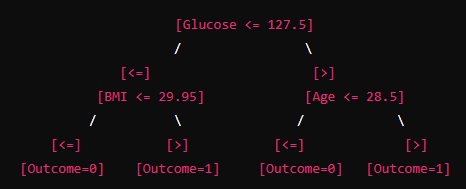

In [35]:
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Train and Evaluate Decision Tree Classifier
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = decision_tree.predict(X_test_scaled)




In [16]:
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

In [17]:
accuracy_tree

0.7272727272727273

In [20]:
print(report_tree)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



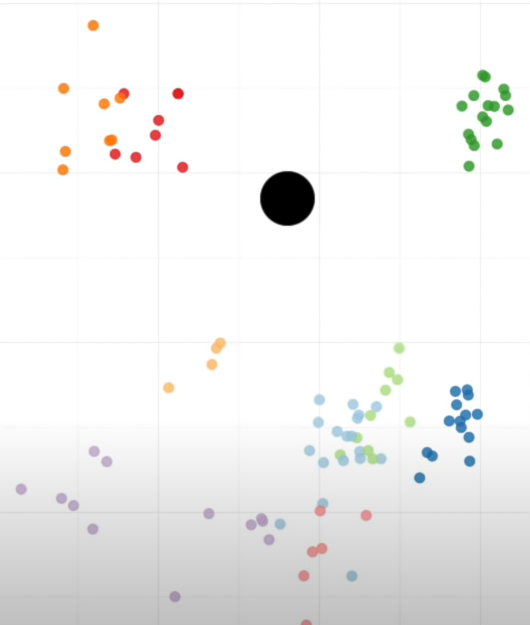

In [21]:
# Step 2: Train and Evaluate K-Nearest Neighbors Classifier
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)



In [24]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

accuracy_knn

0.7532467532467533

In [25]:
print(report_knn)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Set up Grid Search with 5-fold Cross Validation for Decision Tree
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree,
                                cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search_tree.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [27]:
# Best hyperparameters for Decision Tree
best_params_tree = grid_search_tree.best_params_

# Best score for Decision Tree
best_score_tree = grid_search_tree.best_score_

In [28]:
best_params_tree

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [29]:
best_score_tree

0.7573237371717979

In [30]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Set up Grid Search with 5-fold Cross Validation for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn,
                               cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search_knn.fit(X_train_scaled, y_train)

# Best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_

# Best score for KNN
best_score_knn = grid_search_knn.best_score_



In [31]:
print("Best hyperparameters for Decision Tree:", best_params_tree)
print("Best cross-validation score for Decision Tree:", best_score_tree)
print("Best hyperparameters for KNN:", best_params_knn)
print("Best cross-validation score for KNN:", best_score_knn)

Best hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.7573237371717979
Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.7736238837798215


In [37]:
# Use the best hyperparameters to initialize the models
best_decision_tree = DecisionTreeClassifier(**best_params_tree, random_state=42)
best_knn = KNeighborsClassifier(**best_params_knn)

In [38]:
# Train the models on the training data
best_decision_tree.fit(X_train_scaled, y_train)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [39]:
# Make predictions on the test data
y_pred_tree_best = best_decision_tree.predict(X_test_scaled)
y_pred_knn_best = best_knn.predict(X_test_scaled)

In [40]:

# Generate confusion matrices
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree_best)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_best)

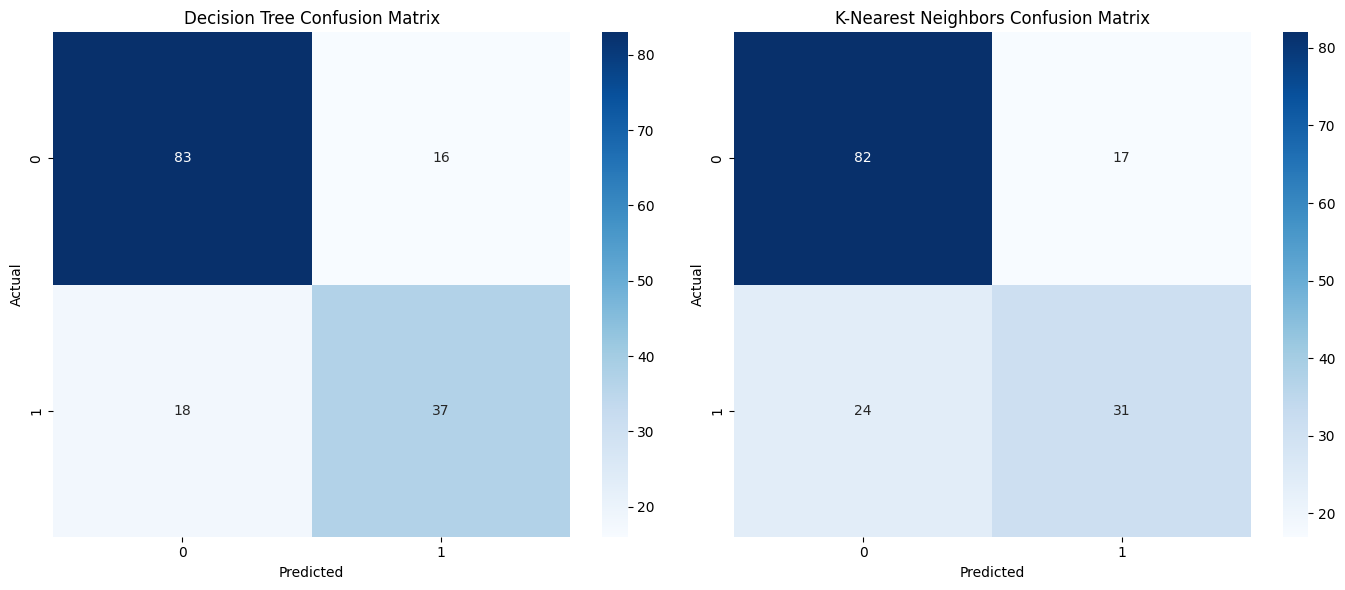

In [42]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Confusion Matrix
sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# KNN Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', ax=axes[1])
axes[1].set_title('K-Nearest Neighbors Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

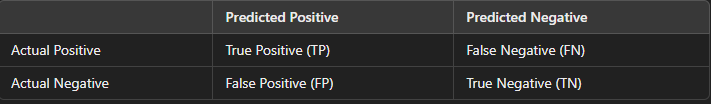